In [3]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import cv2
from skimage.measure import regionprops


In [12]:
image = cv2.imread('./IC_1.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [10]:
image.shape

(229, 220, 3)

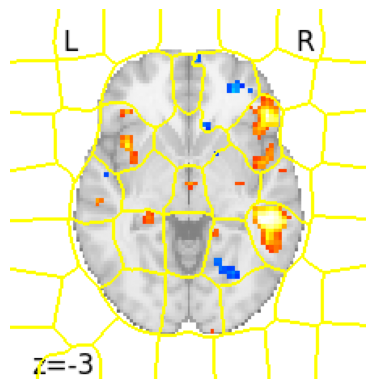

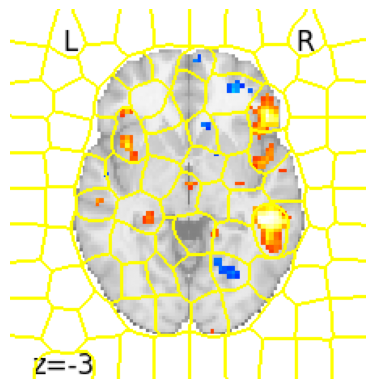

In [48]:
image = cv2.imread('./IC_10.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
for numSegments in ([50,100]):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5, slic_zero=True)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)

	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

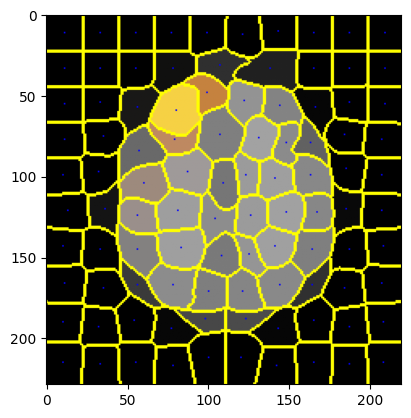

In [4]:
from skimage.measure import regionprops

def paint_region_with_avg_intensity(img,rp, mi, channel):
    for i in range(rp.shape[0]):
        img[rp[i][0]][rp[i][1]][channel] = mi

image = cv2.imread('./IC_5.png')
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
origin=image.copy()
segments = slic(image, n_segments = 100, sigma = 5, slic_zero=True)
regions = regionprops(segments, intensity_image=image[:,:,0])
features=[[] for i in range(len(regions))]
for i in range(3):
    regions = regionprops(segments, intensity_image=image[:,:,i])
    for id,r in enumerate(regions):
        features[id].append(int(r.mean_intensity))
        paint_region_with_avg_intensity(image,r.coords, int(r.mean_intensity), i)
regions = regionprops(segments)
for id,props in enumerate(regions):
  cx, cy = props.centroid  # centroid coordinates
  cx=int(cx)
  cy=int(cy)
  image = cv2.circle(image, (cy,cx), radius=0, color=(0, 0, 255), thickness=-1)
  features[id].append(cy)
  features[id].append(cx)
imgs=[image]
for i in imgs:
  fig = plt.figure("Superpixels -- %d segments" % (50))
  ax = fig.add_subplot(1, 1, 1)
  ax.imshow(mark_boundaries(i, segments))
  # plt.axis("off")
plt.show()

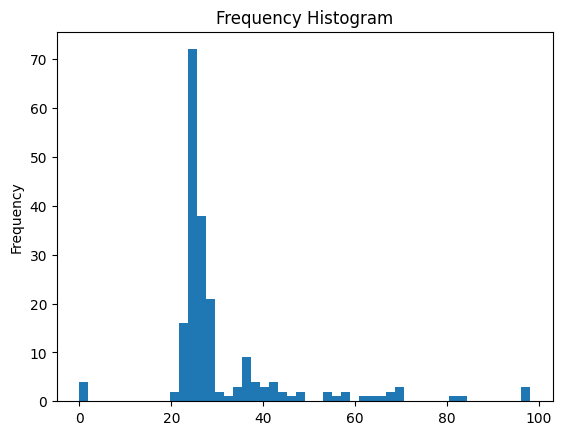

In [6]:
fact=255/image.shape[0]
features2=[[i[0],i[1],i[2],i[3]*fact,i[4]*fact] for i in features]
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array(features2)
nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors(X)

distances2=distances[distances != 0]
import matplotlib.pyplot as plt
plt.hist(distances2, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10, 11, 15], [11, 10, 27], [12], [13], [14], [15], [16], [17], [18], [19, 34, 21], [20], [21, 19, 34], [22, 25], [23], [24], [25], [26], [27], [28], [29, 20], [30], [31, 26, 43], [32], [33], [34, 19, 48], [35], [36], [37], [38, 47, 29], [39], [40, 42], [41], [42], [43], [44], [45], [46], [47, 53], [48, 40], [49, 52, 63], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64, 72], [65], [66], [67], [68], [69, 87, 88], [70, 88, 86], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87, 69], [88, 70], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98]]


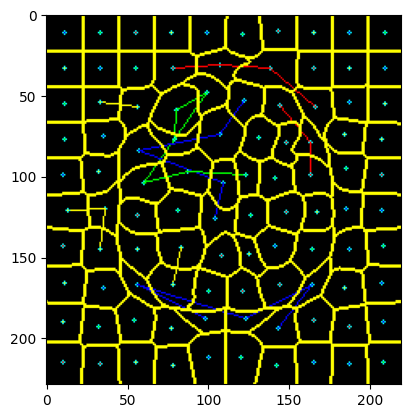

In [7]:
distances, indices = nbrs.kneighbors(X)
indices=indices.tolist()
for i in range(len(distances)):
  for j in range(len(distances[i])-1,-1,-1):
    if distances[i][j]<=40 and distances[i][j]>1:
      del indices[i][j]
print(indices)
def mergegroup(g1,g2):
  for i in groups[g2]:
    groups[g1].append(i)
    vertices[i]=g1
  groups[g2]=[]
groups=[]
vertices=[-1]*100
for i in indices:
  for j in i:
    if j==i[0]:
      if vertices[j]==-1:
        currentgroup=len(groups)
        vertices[j]=currentgroup
        groups.append([j])
      else:
        currentgroup=vertices[j]
    else:
      if vertices[j]==-1:
        vertices[j]=currentgroup
        groups[currentgroup].append(j)
      else:
        if currentgroup==vertices[j]:
          continue
        if len(groups[vertices[j]])>len(groups[currentgroup]):
          mergegroup(vertices[j],currentgroup)
          currentgroup=vertices[j]
        else:
          mergegroup(currentgroup,vertices[j])

import cv2  # Not actually necessary if you just want to create an image.
import numpy as np
height, width, channels = image.shape
blank_image = np.zeros((height,width,3), np.uint8)
fig = plt.figure("Superpixels -- %d segments" % (50))
ax = fig.add_subplot(1, 1, 1)
color=[(0,0,255),(0,255,0),(255,0,0),(255,255,0)]
for i in indices:
  cy=features[i[0]][3]
  cx=features[i[0]][4]
  blank_image = cv2.circle(blank_image, (cy,cx), radius=0, color=(0, 255, 255), thickness=2)
  for j in i:
    cy2=features[j][3]
    cx2=features[j][4]
    blank_image = cv2.circle(blank_image, (cy2,cx2), radius=0, color=(0, 255, 255), thickness=-1)
    blank_image = cv2.line(blank_image, (cy,cx), (cy2,cx2), color=color[vertices[j]%4], thickness=1)
ax.imshow(mark_boundaries(blank_image, segments))
# ax.imshow(blank_image)
plt.show()

In [31]:
indices=indices.tolist()
for i in range(len(distances)):
  for j in range(len(distances[i])-1,-1,-1):
    if distances[i][j]>40:
      del indices[i][j]

In [38]:
def mergegroup(g1,g2):
  for i in groups[g2]:
    groups[g1].append(i)
    vertices[i]=g1
  groups[g2]=[]
groups=[]
vertices=[-1]*100
for i in indices:
  for j in i:
    if j==i[0]:
      if vertices[j]==-1:
        currentgroup=len(groups)
        vertices[j]=currentgroup
        groups.append([j])
      else:
        currentgroup=vertices[j]
    else:
      if vertices[j]==-1:
        vertices[j]=currentgroup
        groups[currentgroup].append(j)
      else:
        if currentgroup==vertices[j]:
          continue
        if len(groups[vertices[j]])>len(groups[currentgroup]):
          mergegroup(vertices[j],currentgroup)
          currentgroup=vertices[j]
        else:
          mergegroup(currentgroup,vertices[j])

In [ ]:
import cv2  # Not actually necessary if you just want to create an image.
import numpy as np
height, width, channels = image.shape
blank_image = np.zeros((height,width,3), np.uint8)
fig = plt.figure("Superpixels -- %d segments" % (50))
ax = fig.add_subplot(1, 1, 1)
color=[(0,0,255),(0,255,0),(255,0,0),(255,255,0)]
for i in indices:
  cy=features[i[0]][3]
  cx=features[i[0]][4]
  blank_image = cv2.circle(blank_image, (cy,cx), radius=0, color=(0, 255, 255), thickness=2)
  for j in i:
    cy2=features[j][3]
    cx2=features[j][4]
    blank_image = cv2.circle(blank_image, (cy2,cx2), radius=0, color=(0, 255, 255), thickness=-1)
    blank_image = cv2.line(blank_image, (cy,cx), (cy2,cx2), color=color[vertices[j]%4], thickness=1)
ax.imshow(mark_boundaries(blank_image, segments))
# ax.imshow(blank_image)
plt.show()

In [ ]:
!pip install torch_geometric

In [35]:
#@title oldmodel
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GCNConv, self).__init__(aggr='add')
        self.lin = torch.nn.Linear(in_channels, out_channels)

    def forward(self, x, edge_index):
        # Step 1: Add self-loops
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Multiply with weights
        x = self.lin(x)

        # Step 3: Calculate the normalization
        row, col = edge_index
        deg = degree(row, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4: Propagate the embeddings to the next layer
        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x,
                              norm=norm)

    def message(self, x_j, norm):
        # Normalize node features.
        return norm.view(-1, 1) * x_j

import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, dataset):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [48]:
all_node_feats=np.asarray(features)
all_node_feats=torch.tensor(all_node_feats,dtype=torch.float)
coo=[]
for id, i in enumerate(indices):
  for j in i[1:]:
    coo.append([id,j])
coo=np.array(coo)
coo=np.reshape(coo,(2,-1))
coo=torch.tensor(coo,dtype=torch.long)
data=[[all_node_feats,coo,'0']]

In [49]:
#@title dataset
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np
import os

print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")



class fMRIGraphDataset(Dataset):
    def __init__(self,root,filename, data, test=False, transform=None, pre_transform=None):
        """
        root = Where the dataset should be stored. This folder is split
        into raw_dir (downloaded dataset) and processed_dir (processed data).
        """
        self.test = test
        self.data=data
        self.filename=filename
        super(fMRIGraphDataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        return self.filename

    @property
    def processed_file_names(self):
        """ If these files are found in raw_dir, processing is skipped"""
        pass
        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in range(len(self.data))]

    def download(self):
        pass

    def process(self):
        for index, images in enumerate(self.data):
            node_feats = images[0]
            # Get edge features
            edge_index = images[1]
            # Get labels info
            label = images[2]

            # Create data object
            data = Data(x=node_feats,
                        edge_index=edge_index,
                        y=label,
                        )
            if self.test:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_test_{index}.pt'))
            else:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_{index}.pt'))
    def len(self):
        return len(self.data)

    def get(self, idx):
        """ - Equivalent to __getitem__ in pytorch
            - Is not needed for PyG's InMemoryDataset
        """
        if self.test:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_test_{idx}.pt'))
        else:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_{idx}.pt'))
        return data
fmridata=fMRIGraphDataset('./data','test.csv',data)

Torch version: 2.0.1+cu118
Cuda available: False
Torch geometric version: 2.3.1


In [52]:
def train_one_epoch(model, train_loader, optimizer, loss_fn):
    train_accuracies, test_accuracies = list(), list()
    for epoch in range(100):
            model.train()
            optimizer.zero_grad()

            for _, batch in enumerate(train_loader):
                # Use GPU
                batch.to(device)
                # Reset gradients
                optimizer.zero_grad()
                # Passing the node features and the connection info
                pred = model(batch.x.float(),
                                        batch.edge_index,
                                        batch.batch)

            loss = loss_fn(torch.squeeze(pred), batch.y.float())
            loss.backward()
            optimizer.step()
            print(loss.item())

In [51]:
#@title new model
import torch
import torch.nn.functional as F
from torch.nn import Linear, BatchNorm1d, ModuleList
from torch_geometric.nn import TransformerConv, TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
class GNN(torch.nn.Module):
    def __init__(self, feature_size, model_params):
        super(GNN, self).__init__()
        embedding_size = model_params["model_embedding_size"]
        n_heads = model_params["model_attention_heads"]
        self.n_layers = model_params["model_layers"]
        dropout_rate = model_params["model_dropout_rate"]
        top_k_ratio = model_params["model_top_k_ratio"]
        self.top_k_every_n = model_params["model_top_k_every_n"]
        dense_neurons = model_params["model_dense_neurons"]

        self.conv_layers = ModuleList([])
        self.transf_layers = ModuleList([])
        self.pooling_layers = ModuleList([])
        self.bn_layers = ModuleList([])

        # Transformation layer
        self.conv1 = TransformerConv(feature_size,
                                    embedding_size,
                                    heads=n_heads,
                                    dropout=dropout_rate,
                                    beta=True)

        self.transf1 = Linear(embedding_size*n_heads, embedding_size)
        self.bn1 = BatchNorm1d(embedding_size)

        # Other layers
        for i in range(self.n_layers):
            self.conv_layers.append(TransformerConv(embedding_size,
                                                    embedding_size,
                                                    heads=n_heads,
                                                    dropout=dropout_rate,
                                                    beta=True))

            self.transf_layers.append(Linear(embedding_size*n_heads, embedding_size))
            self.bn_layers.append(BatchNorm1d(embedding_size))
            if i % self.top_k_every_n == 0:
                self.pooling_layers.append(TopKPooling(embedding_size, ratio=top_k_ratio))


        # Linear layers
        self.linear1 = Linear(embedding_size*2, dense_neurons)
        self.linear2 = Linear(dense_neurons, int(dense_neurons/2))
        self.linear3 = Linear(int(dense_neurons/2), 1)

    def forward(self, x, edge_index, batch_index):
        # Initial transformation
        x = self.conv1(x, edge_index)
        x = torch.relu(self.transf1(x))
        x = self.bn1(x)

        # Holds the intermediate graph representations
        global_representation = []

        for i in range(self.n_layers):
            x = self.conv_layers[i](x, edge_index)
            x = torch.relu(self.transf_layers[i](x))
            x = self.bn_layers[i](x)
            # Always aggregate last layer
            if i % self.top_k_every_n == 0 or i == self.n_layers:
                x , edge_index, batch_index, _, _ = self.pooling_layers[int(i/self.top_k_every_n)](
                    x, edge_index, batch_index
                    )
                # Add current representation
                global_representation.append(torch.cat([gmp(x, batch_index), gap(x, batch_index)], dim=1))

        x = sum(global_representation)

        # Output block
        x = torch.relu(self.linear1(x))
        x = F.dropout(x, p=0.8, training=self.training)
        x = torch.relu(self.linear2(x))
        x = F.dropout(x, p=0.8, training=self.training)
        x = self.linear3(x)

        return x



In [53]:
from torch_geometric.data import DataLoader
train_loader = DataLoader(fmridata, batch_size=10, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
params={ "model_embedding_size": 64,
    "model_attention_heads": 3,
    "model_layers": 4,
    "model_dropout_rate": 0.2,
    "model_top_k_ratio": 0.5,
    "model_top_k_every_n": 1,
    "model_dense_neurons": 256}
params["model_edge_dim"] = 0
model_params = {k: v for k, v in params.items() if k.startswith("model_")}
model = GNN(feature_size=fmridata[0].x.shape[1], model_params=model_params)
model = model.to(device)

weight = torch.tensor([1], dtype=torch.float32).to(device)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=weight)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.8,
                            weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)
model.train()
train_one_epoch(model, train_loader, optimizer, loss_fn)

IndexError: ignored